In [2]:
import pandas as pd

df = pd.read_csv("insurance.csv")
df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,idade,imc,filhos,encargos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Verificando Outliers

<Axes: ylabel='encargos'>

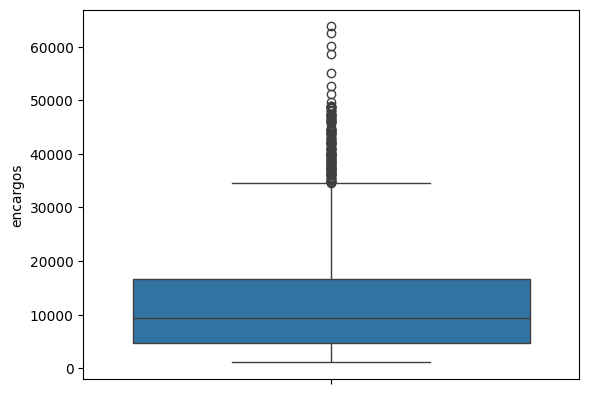

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['encargos'])

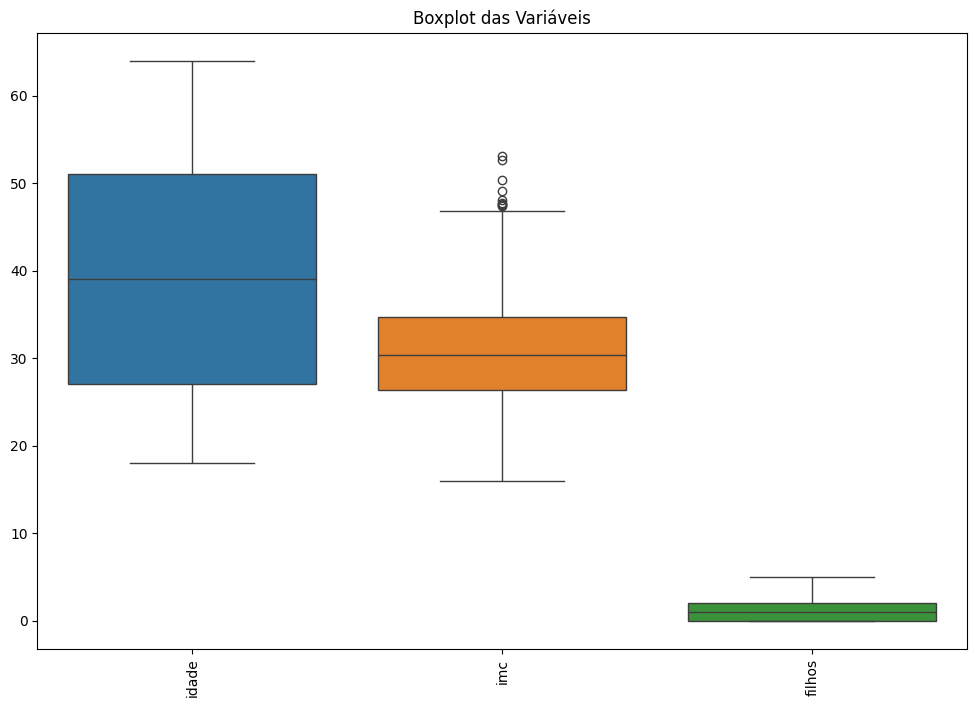

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualização da matriz de correla
# Plotando boxplots para visualizar os outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['encargos']))
plt.title('Boxplot das Variáveis')
plt.xticks(rotation=90)
plt.show()

# Corrigindo Colunas Categoricas como Label Encoder

In [6]:
from sklearn.preprocessing import LabelEncoder

# Inicializando LabelEncoder
le = LabelEncoder()

# Aplicando LabelEncoder em variáveis categóricas
df['gênero'] = le.fit_transform(df['gênero'])
df['fumante'] = le.fit_transform(df['fumante'])
df['região'] = le.fit_transform(df['região'])


df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Histograma para verificar a dispersao dos dados

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'gênero'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'fumante'}>,
        <Axes: title={'center': 'região'}>],
       [<Axes: title={'center': 'encargos'}>, <Axes: >, <Axes: >]],
      dtype=object)

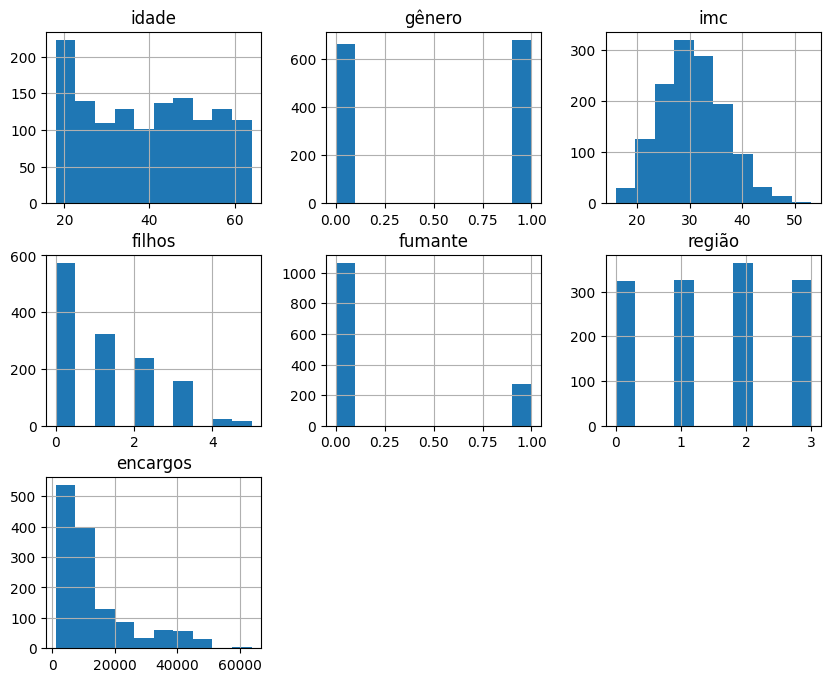

In [7]:

df.hist(figsize=(10,8))

Matriz de Correlaçao para verificar as correlaçoes entre as colunas

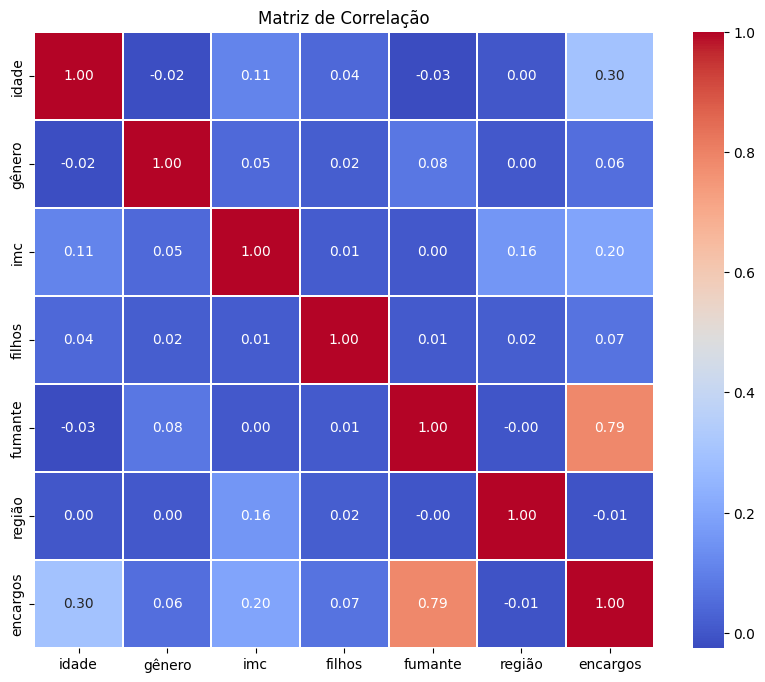

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualização da matriz de correlação

matriz_corr = df.corr()
matriz_corr


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.2)
plt.title('Matriz de Correlação')
plt.show()

In [9]:
rotulos = df['encargos']
base    = df.drop('encargos', axis=1)

rotulos

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: encargos, Length: 1338, dtype: float64

Limpando os dados

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(base, rotulos, test_size=0.2, random_state=42, stratify=base['fumante'] )



colunas= ['idade', 'gênero', 'imc', 'filhos', 'fumante', 'região']

scaler = MinMaxScaler()
scaler.fit(base)

pipeline = ColumnTransformer([
    ('valores nulos', SimpleImputer(strategy="median"), colunas),   
    ('padronizacao da escala', scaler, colunas)
])

"""
Limpando as bases e traino e testes separadamente para evitar vies
"""
X_train = pipeline.fit_transform(X_train)
X_test  = pipeline.fit_transform(X_test)



Definindo calculo de mape

In [11]:
import numpy as np
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

Definindo impressao da analise

In [12]:

# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
# Avaliando o desempenho do modelo
def imprimaAnalise(label, predict):
    erro_medio_quadratico = mean_squared_error(label, predict)
    erro_absoluto_medio = mean_absolute_error(label, predict)
    r_quadrado = r2_score(label, predict)
    mape = calculate_mape(label, predict)
    lin_mse = mean_squared_error(label, predict)
    lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
    lin_rmse

    print(f"Erro Médio Quadrático: {erro_medio_quadratico:.4f}")
    print(f"Erro Absoluto Médio: {erro_absoluto_medio:.4f}")
    print(f"R² (coeficiente de determinação): {r_quadrado:.4f}")

    print(f"O MAPE(média abs do percentual de erro ) é: {mape:.4f}%")
    print(f"O MSE (erro médio) é: {lin_rmse:.2f}")

    

    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(label)), label, color='blue', alpha=0.5, label='Valores reais')  # Pontos azuis para os valores reais
    plt.scatter(range(len(predict)), predict, color='red', alpha=0.5, label='Valores previstos')  # Pontos vermelhos para as previsões

    plt.title('Gráfico de dispersão entre valores reais e previstos com cores diferentes')
    plt.xlabel('Índice')
    plt.ylabel('Valores')
    plt.legend()  # Adiciona uma legenda para diferenciar
    plt.grid(True)
    plt.show()

Testando Regressao Linear

Regressao Linear
Erro Médio Quadrático: 30896852.7704
Erro Absoluto Médio: 3857.5947
R² (coeficiente de determinação): 0.7906
O MAPE(média abs do percentual de erro ) é: 38.1931%
O MSE (erro médio) é: 5558.49


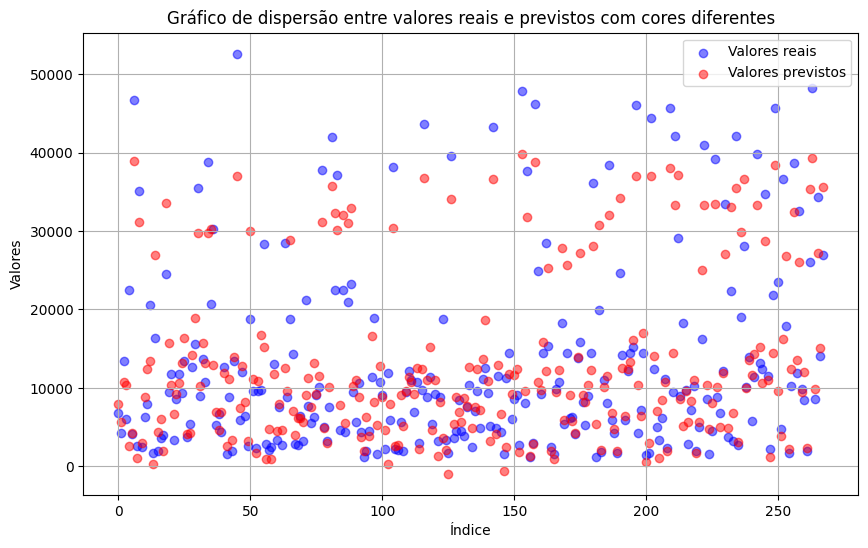

In [13]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)
previsoes = model.predict(X_test)
print("Regressao Linear")
imprimaAnalise(y_test, previsoes)


Testando arvore de decisao

Arvore de Decisao
Erro Médio Quadrático: 21498256.5961
Erro Absoluto Médio: 2779.2633
R² (coeficiente de determinação): 0.8543
O MAPE(média abs do percentual de erro ) é: 35.1965%
O MSE (erro médio) é: 4636.62


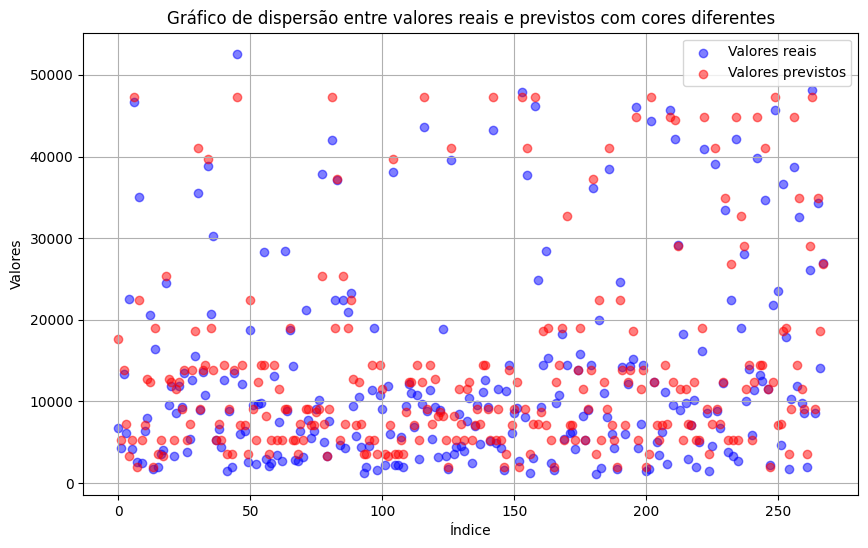

In [14]:
from sklearn.tree import DecisionTreeRegressor

model_tr = DecisionTreeRegressor(max_depth=5)
model_tr.fit(X_train, y_train)
previsoes_tr = model_tr.predict(X_test)
print("Arvore de Decisao")
imprimaAnalise(y_test, previsoes_tr)


RandomForestRegressor
Erro Médio Quadrático: 25051563.7863
Erro Absoluto Médio: 3069.3193
R² (coeficiente de determinação): 0.8302
O MAPE(média abs do percentual de erro ) é: 42.0163%
O MSE (erro médio) é: 5005.15


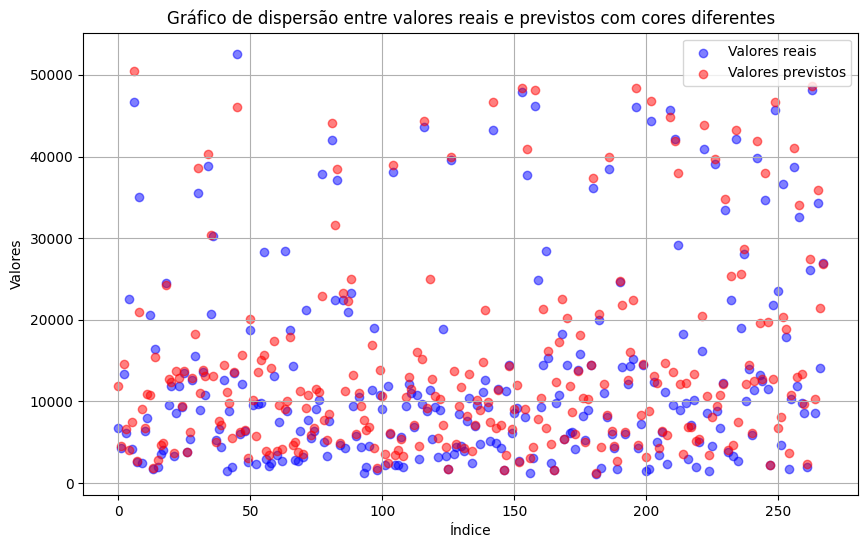

In [15]:
from sklearn.ensemble import RandomForestRegressor

model_tr = RandomForestRegressor()
model_tr.fit(X_train, y_train)
previsoes_tr = model_tr.predict(X_test)
print("RandomForestRegressor")
imprimaAnalise(y_test, previsoes_tr)


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import  GridSearchCV

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
   # 'n_estimators': range(100, 301, 50),  # Testar de 50 a 300 em passos de 50
   # 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],  # Intervalos mais finos para a taxa de aprendizado
    'max_depth': range(3, 11),  # Profundidades de 3 a 10
    #'min_samples_split': range(2, 11),  # De 2 a 10 para observar efeitos mais sutis
   # 'min_samples_leaf': range(1, 6),  # De 1 a 5 para ver diferentes níveis de suavização
    'subsample': [0.7, 0.8, 0.9, 1.0]  # Testando valores mais baixos para subsampling
}
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")



Best parameters: {'max_depth': 3, 'subsample': 1.0}
Best cross-validation score: 0.8431681007915823


GBM
Erro Médio Quadrático: 18334493.6630
Erro Absoluto Médio: 2511.1456
R² (coeficiente de determinação): 0.8757
O MAPE(média abs do percentual de erro ) é: 31.0176%
O MSE (erro médio) é: 4281.88


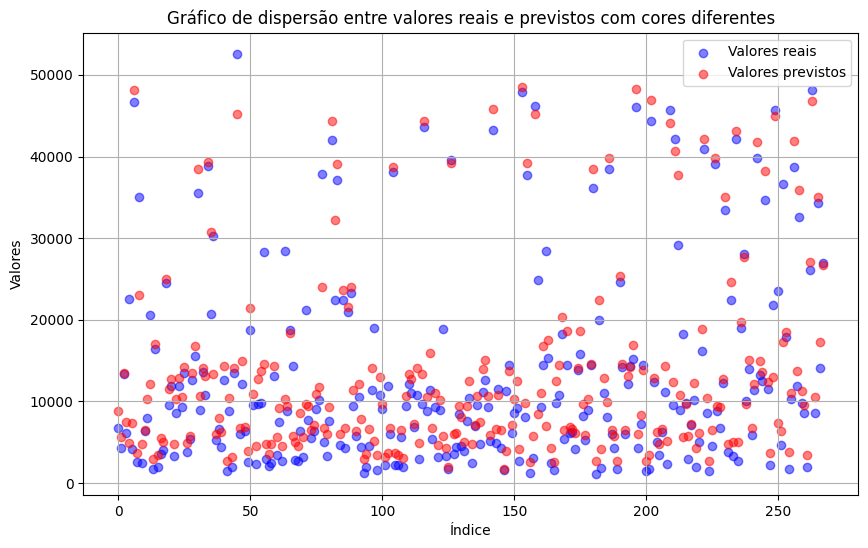

In [17]:

model_tr = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=1.0, random_state=42)
model_tr.fit(X_train, y_train)
previsoes_tr = model_tr.predict(X_test)
print("GBM")
imprimaAnalise(y_test, previsoes_tr)

